In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import resample

ImportError: C extension: None not built. If you want to import pandas from the source directory, you may need to run 'python setup.py build_ext' to build the C extensions first.

In [61]:
df = pd.read_csv('/Users/kidawr/Downloads/untitled folder/merget_dataset.csv')
df1 = pd.read_csv('/Users/kidawr/Downloads/untitled folder/user_group_encod.csv')
df = pd.merge(df, df1, on='key', how='inner')
df = df.drop(columns='expiration_minus_1d_dt')
df = df.drop(columns=['Unnamed: 0_y', 'Unnamed: 0_x',
    "credit_class_y",
    "t-gorod",
    "Traty_bolee_10tys",
    "NS_keptivnaja_strahovka",
    "life_exp",
    "investor",
    "Supermarket",  
    "traveller",
    "VZR",
    "cred_av_log",
    "Onlajn_tranzaktsija", 
    'key'])
df.info()                

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593432 entries, 0 to 593431
Data columns (total 75 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   target_x                            593432 non-null  int64  
 1   Poluchaet_ZP_x                      593432 non-null  int64  
 2   Oplata_SBP_po_QR_x                  593432 non-null  int64  
 3   Internet_x                          593432 non-null  int64  
 4   Ishodjaschij_SBP_perevod_x          593432 non-null  int64  
 5   Poluchil_vhodjaschij_SBP_x          593432 non-null  int64  
 6   credit_class_x                      593432 non-null  int64  
 7   avg_hl_delay_log                    587323 non-null  float64
 8   delay_m4_cnt_category               593432 non-null  int64  
 9   sovokupnye_traty                    593432 non-null  int64  
 10  avg_integral_cur_rur_balance        593432 non-null  int64  
 11  avg_out_puc               

In [62]:
#df = df[df['user_group_encod'] == 1]
df['Pro']

0         0.0
1         1.0
2         0.0
3         0.0
4         1.0
         ... 
593427    0.0
593428    0.0
593429    0.0
593430    1.0
593431    1.0
Name: Pro, Length: 593432, dtype: float64

In [63]:
df = df.dropna()
df

,target_x,Poluchaet_ZP_x,Oplata_SBP_po_QR_x,Internet_x,Ishodjaschij_SBP_perevod_x,Poluchil_vhodjaschij_SBP_x,credit_class_x,avg_hl_delay_log,delay_m4_cnt_category,sovokupnye_traty,...,Nakopitel'nyj_schet,Brokerskij_schet,Kreditnyj_produkt,count_of_open_brk,count_of_ever_opened_ccr,count_of_all_open,median_count_of_ever_opened_cor,avg_count_of_utils_lon,insurance,user_group_encod
0,0,0,0,0,0,0,2,0.775721,1,0,...,1.0,1.0,1.0,-0.628947,0.363142,-1.086701,-0.084553,-0.374220,1,0
1,0,0,0,0,1,1,2,0.627673,1,0,...,0.0,1.0,0.0,-0.628947,0.363142,-0.440391,-0.039904,0.783685,0,0
2,0,0,1,0,1,1,2,0.517147,1,6,...,0.0,0.0,0.0,-0.628947,-0.799068,-1.086701,-0.062228,-0.502876,0,1
3,1,0,1,0,1,1,0,0.454584,3,6,...,1.0,1.0,1.0,-0.628947,1.525351,0.205919,-0.270593,-0.502876,1,2
4,0,0,0,0,1,1,2,0.497944,1,4,...,1.0,0.0,1.0,-0.628947,0.363142,-1.086701,-0.278035,-0.502876,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593427,0,0,0,0,0,0,2,0.579872,1,0,...,0.0,1.0,0.0,1.119289,-0.799068,0.205919,-0.397100,-0.374220,0,1
593428,0,0,1,0,1,1,0,0.775721,3,4,...,0.0,1.0,1.0,-0.628947,1.525351,-1.086701,-0.411983,-0.374220,0,1
593429,0,0,0,0,1,1,2,0.326536,1,4,...,1.0,0.0,0.0,-0.628947,-0.799068,-1.086701,-0.397100,-0.245564,0,2
593430,0,0,0,1,0,1,2,0.746875,3,5,...,1.0,1.0,0.0,1.119289,-0.799068,0.852229,0.324734,1.619949,1,1


In [64]:
from sklift.models import TwoModels
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 1. Отделяем X, y, treatment
features = df.drop(columns=['user_group_encod', 'Pro', 'target_x'])
treatment = df['Pro']          # treatment (w)
y = df['target_x']             # target (y)

# 2. Сплит на train/test
X_train, X_test, y_train, y_test, treatment_train, treatment_test = train_test_split(
    features, y, treatment, test_size=0.5, random_state=42
)

# 3. Создаем модели для treatment и control с RandomForestClassifier
model_treatment = RandomForestClassifier(random_state=42)
model_control = RandomForestClassifier(random_state=42)

# 4. Создаем uplift модель TwoModels
uplift_model = TwoModels(
    estimator_trmnt=model_treatment,
    estimator_ctrl=model_control,
    method='vanilla'
)

# 5. Обучаем uplift модель
uplift_model.fit(X_train, y_train, treatment_train)

# 6. Предсказываем uplift на тесте
uplift_preds = uplift_model.predict(X_test)

# 7. Оценка модели (если есть функция для метрик uplift)
# results = get_metrics(y_test, uplift_preds, treatment_test)
# print(results)


In [73]:
from sklift.metrics import uplift_at_k, qini_auc_score

# y_test - реальные метки
# treatment_test - индикатор treatment/control
# uplift_preds - предсказания модели (uplift score)

# 1. Uplift at top 30% (процент можно менять)
score_uplift_30 = uplift_at_k(y_true=y_test, uplift=uplift_preds, treatment=treatment_test, strategy='by_group', k=0.30)
print(f"Uplift at top 30%: {score_uplift_30}")

# 2. Qini AUC
score_qini = qini_auc_score(y_true=y_test, uplift=uplift_preds, treatment=treatment_test)
print(f"Qini AUC: {score_qini}")


Uplift at top 30%: 0.09463242310581602
Qini AUC: 0.20669902246636038


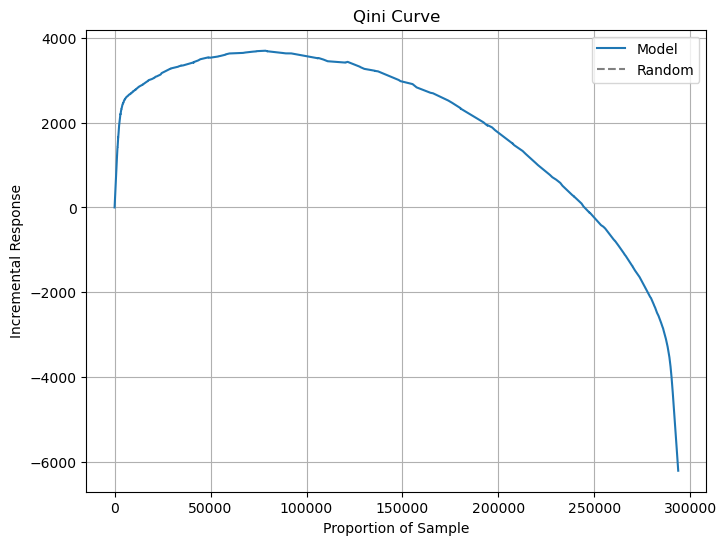

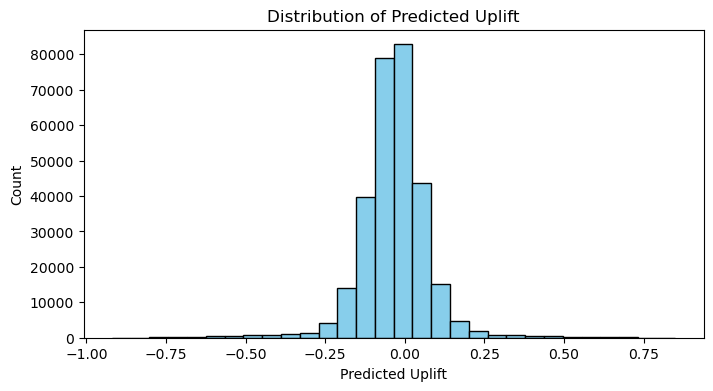

In [66]:
import matplotlib.pyplot as plt
from sklift.metrics import qini_curve

# Получаем координаты для Qini-кривой
qini_x, qini_y = qini_curve(y_true=y_test, uplift=uplift_preds, treatment=treatment_test)

plt.figure(figsize=(8,6))
plt.plot(qini_x, qini_y, label='Model')
plt.plot([0,1], [0,0], linestyle='--', color='gray', label='Random')
plt.xlabel('Proportion of Sample')
plt.ylabel('Incremental Response')
plt.title('Qini Curve')
plt.legend()
plt.grid(True)
plt.show()

# Гистограмма uplift прогнозов
plt.figure(figsize=(8,4))
plt.hist(uplift_preds, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Uplift')
plt.xlabel('Predicted Uplift')
plt.ylabel('Count')
plt.show()
